# BitTigger DS501 Week 8
## Bank Marketing

## Goal: predict if the client will subscribe a term deposity (label: y)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

Because the input file use semicolon as field separator, we have to specify the `sep` argument.

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

### Inspect dataset

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are
* 45211 rows and 17 columns.
* No missing value
* 10 columns with object type. Need to check these columns.

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


`balance`, `duration`, `campaign`, `pdays`, and `previous` have outliers.

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Select those columns with object type

In [7]:
obj_cols = []
for col in df.columns:
    if df[col].dtype == 'O': # O for object
#         print(col)
        obj_cols.append(col)
print(obj_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


Since `y` is our label, it cannot be included in our features.

In [8]:
obj_cols.remove('y')
print(obj_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


檢查所有 `object` 型態的欄位

In [9]:
# obj_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in obj_cols:
    print('***<< ' + col + ': ' + str(df[col].nunique()) + ' >>***')
    print(df[col].value_counts())
    print('***')

***<< job: 12 >>***
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
***
***<< marital: 3 >>***
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
***
***<< education: 4 >>***
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
***
***<< default: 2 >>***
no     44396
yes      815
Name: default, dtype: int64
***
***<< housing: 2 >>***
yes    25130
no     20081
Name: housing, dtype: int64
***
***<< loan: 2 >>***
no     37967
yes     7244
Name: loan, dtype: int64
***
***<< contact: 3 >>***
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
***
***<< month: 12 >>***
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     

把所有 binary 和 category 的欄位都改成 one hot encoding

In [10]:
df = pd.get_dummies(df, columns=obj_cols)

One hot encoding 完再看一下欄位有沒有成功

In [11]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [12]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:
print(df.columns)
print(type(df.columns))

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [14]:
selected_features = df.columns.difference(['y'])
print(selected_features)

Index(['age', 'balance', 'campaign', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day', 'default_no', 'default_yes', 'duration',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'loan_no', 'loan_yes', 'marital_divorced', 'marital_married',
       'marital_single', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'pdays', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'previous'],
      dtype='object')


要預測的欄位 `y` 也是 `object` 的型態，要改成數值

In [15]:
df['y'] = (df['y'] == 'yes').astype(int)

轉換成 numpy array

In [16]:
X = df.drop('y', axis=1).values # 除了 y 以外的其他全部欄位
y = df['y'].values

In [17]:
X.shape

(45211, 51)

### Build models

#### train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 51), (9043, 51), (36168,), (9043,))

#### Define metric

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC', 'Accuracy', 'Precision', 'Recall', 'f1-score']
    
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                           accuracy_score(y_train, p_train_pred > threshold),
                           precision_score(y_train, p_train_pred > threshold),
                           recall_score(y_train, p_train_pred > threshold),
                           f1_score(y_train, p_train_pred > threshold)]
    
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                          accuracy_score(y_test, p_test_pred > threshold),
                          precision_score(y_test, p_test_pred > threshold),
                          recall_score(y_test, p_test_pred > threshold),
                          f1_score(y_test, p_test_pred > threshold)]
    
    all_metrics = pd.DataFrame({'metrics': metric_names,
                                'train': metric_values_train,
                                'test': metric_values_test},
                                columns=['metrics', 'train', 'test'])

    all_metrics.set_index('metrics')
    print(all_metrics)

#### Define ploting functions

In [21]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred):
    roc_auc_train = roc_auc_score(y_train, p_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)
    
    roc_auc_test = roc_auc_score(y_test, p_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)
    
    lw=2
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='green', linewidth=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange', linewidth=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', linewidth=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()

In [22]:
def plot_feature_importance(model):
    df_feature_importance = pd.DataFrame()
    df_feature_importance['feature'] = selected_features
    df_feature_importance['importance'] = model.feature_importances_
    df_feature_importance.sort_values('importance', inplace=True)
    
    ax = df_feature_importance.plot(kind='barh', figsize=(20, 10))
    t = np.arange(len(df_feature_importance['feature']))
    ax.set_yticks(t)
    ax.set_yticklabels(df_feature_importance['feature'])
    plt.show()

#### Define model and performance function

The first column of `.predict_prob()` output is the probability of zero, and the second column is the probability of 1.

In [23]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_train_prob = clf.predict_proba(X_train)[:, 1]
    
    y_test_pred = clf.predict(X_test)
    y_test_prob = clf.predict_proba(X_test)[:, 1]
    
    get_performance_metrics(y_train, y_train_prob, y_test, y_test_prob)
    plot_roc_curve(y_train, y_train_prob, y_test, y_test_prob)

#### Logistic Regression

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


     metrics     train      test
0        AUC  0.909798  0.896347
1   Accuracy  0.902815  0.899591
2  Precision  0.657790  0.629382
3     Recall  0.350686  0.354657
4   f1-score  0.457478  0.453670


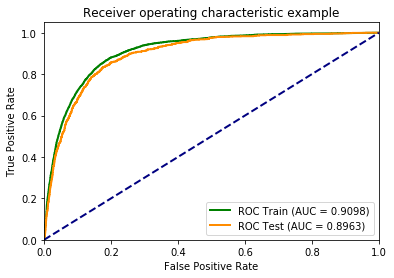

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, penalty='l2')
train_test_model(lr, X_train, y_train, X_test, y_test)

##### The estimated coefficients

In [25]:
print(lr.coef_) # it is a 1x51 array
print(lr.coef_.shape)
print(lr.coef_.flatten()) # become 1 dim vector
print(lr.coef_.flatten().shape)

[[-2.81644504e-03  1.44165848e-05  6.61581984e-03  4.23344760e-03
  -8.47218856e-02 -3.21151517e-04  6.59870274e-03  5.16435455e-02
  -2.15740526e-01 -3.41042574e-01 -3.46233610e-01 -1.03883938e-01
   4.24136538e-01 -1.61712536e-01 -2.20889848e-01  3.68771142e-01
  -9.04224006e-02 -3.59431316e-02 -6.21653289e-02 -1.53492102e-01
  -4.23570066e-01 -1.56420501e-01 -3.99521625e-01 -1.99462060e-01
  -2.57381531e-03 -1.31925168e-01 -4.32128590e-01 -3.01354078e-01
  -7.47401912e-03 -7.26008649e-01 -1.63524183e-01 -5.69958485e-01
   4.00041152e-01  1.96151690e-01 -1.32967551e+00 -8.32053371e-02
  -8.01476501e-01  3.43597792e-01 -2.90019831e-01 -9.92855766e-01
  -8.98821469e-01  4.07942318e-01  1.37354160e+00 -4.48105060e-01
  -9.57464047e-01  8.41277512e-01  7.72106127e-01 -7.52602498e-01
  -6.64090988e-01  1.58117644e+00 -8.97965624e-01]]
(1, 51)
[-2.81644504e-03  1.44165848e-05  6.61581984e-03  4.23344760e-03
 -8.47218856e-02 -3.21151517e-04  6.59870274e-03  5.16435455e-02
 -2.15740526e-01 -

In [26]:
coef_values = zip(selected_features, lr.coef_.flatten()) # connect feature names and values
df_coeffs = pd.DataFrame(list(coef_values))
df_coeffs.columns = ['Feature', 'Coefficient']
df_coeffs.sort_values(by='Coefficient', ascending=False, inplace=True)
df_coeffs

,Feature,Coefficient
49,poutcome_unknown,1.581176
42,month_nov,1.373542
45,pdays,0.841278
46,poutcome_failure,0.772106
12,education_tertiary,0.424137
41,month_may,0.407942
32,marital_single,0.400041
15,housing_yes,0.368771
37,month_jan,0.343598
33,month_apr,0.196152


In [27]:
print(X.shape[1])

51


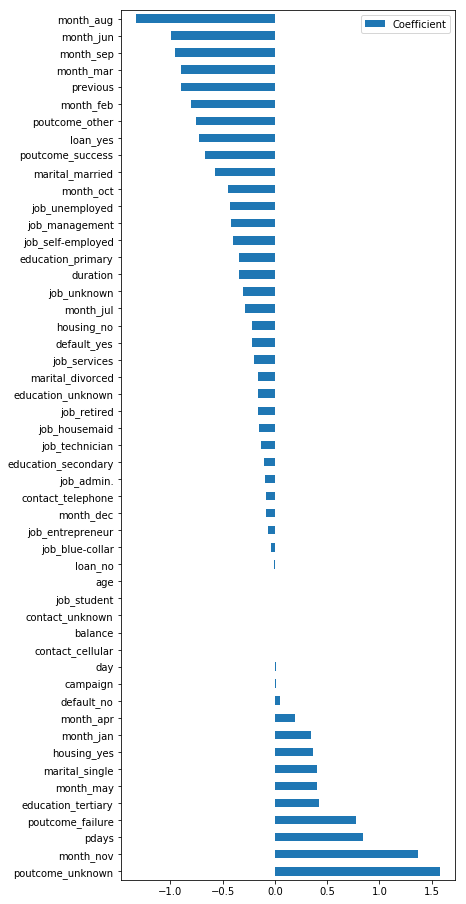

In [28]:
ax = df_coeffs.plot(kind='barh')
ax.set_yticks( np.arange(X.shape[1]) )
ax.set_yticklabels(df_coeffs['Feature'])
plt.gcf().set_size_inches(6, 16)
plt.show()

#### Single Tree

     metrics     train      test
0        AUC  0.965721  0.859065
1   Accuracy  0.933754  0.885879
2  Precision  0.767544  0.516903
3     Recall  0.621155  0.445908
4   f1-score  0.686634  0.478788


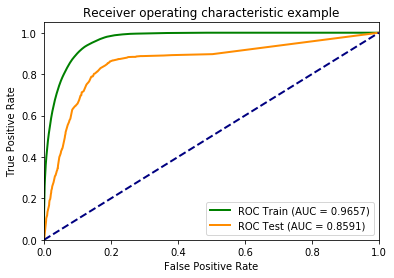

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)
train_test_model(dt, X_train, y_train, X_test, y_test)

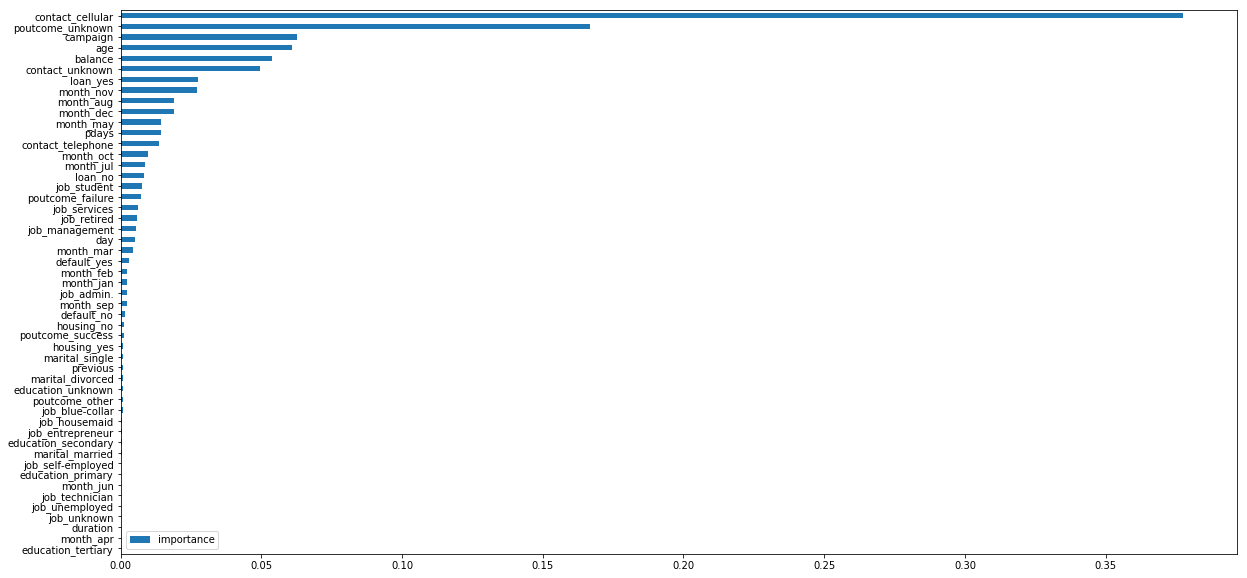

In [30]:
plot_feature_importance(dt)

#### Bagged Trees

     metrics     train      test
0        AUC  0.971850  0.925450
1   Accuracy  0.940970  0.901471
2  Precision  0.825600  0.604878
3     Recall  0.627307  0.466604
4   f1-score  0.712922  0.526819


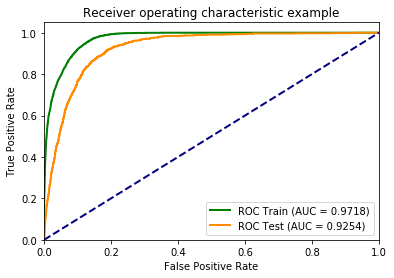

In [31]:
from sklearn.ensemble import BaggingClassifier
dt_clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)
paras_bagged_tree = {'base_estimator': dt_clf,
                     'n_estimators': 50,
                     'n_jobs': -1}
bagged_tree = BaggingClassifier(**paras_bagged_tree)

train_test_model(bagged_tree, X_train, y_train, X_test, y_test)

#### Single KNN

     metrics     train      test
0        AUC  0.956968  0.728772
1   Accuracy  0.924159  0.871945
2  Precision  0.760267  0.435021
3     Recall  0.512541  0.299153
4   f1-score  0.612297  0.354515


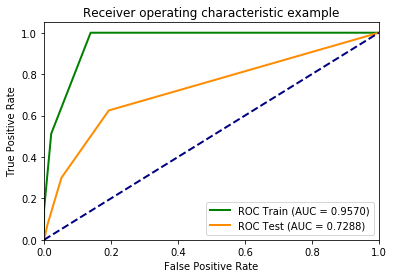

In [32]:
from sklearn.neighbors import KNeighborsClassifier
paras_knn = {'n_neighbors': 3,
             'leaf_size': 10}
knn = KNeighborsClassifier(**paras_knn)

train_test_model(knn, X_train, y_train, X_test, y_test)

#### Bagged KNN

     metrics     train      test
0        AUC  0.976518  0.773515
1   Accuracy  0.930215  0.873493
2  Precision  0.823820  0.438914
3     Recall  0.512305  0.273754
4   f1-score  0.631748  0.337196


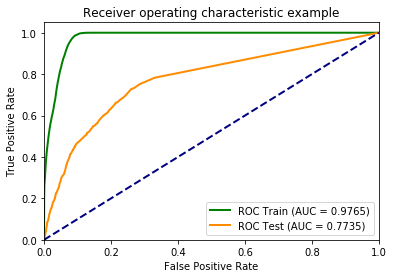

In [33]:
paras_bagged_knn = {'base_estimator': knn,
                    'n_estimators': 30,
                    'n_jobs': -1}
bagged_knn = BaggingClassifier(**paras_bagged_knn)

train_test_model(bagged_knn, X_train, y_train, X_test, y_test)

#### Random Forest

     metrics     train      test
0        AUC  0.947475  0.920596
1   Accuracy  0.908510  0.898264
2  Precision  0.808754  0.686684
3     Recall  0.284193  0.247413
4   f1-score  0.420592  0.363762


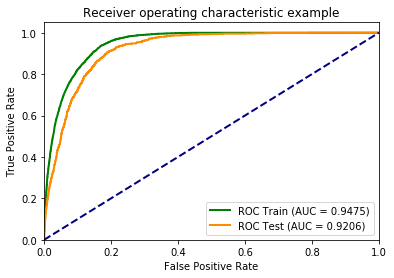

In [34]:
from sklearn.ensemble import RandomForestClassifier
paras_rf = {'n_estimators': 50,
            'max_features': 'auto',
            'criterion': 'gini',
            'max_depth': 20,
            'min_samples_split': 2,
            'min_samples_leaf': 20,
            'random_state': 0,
            'n_jobs': -1}
rf = RandomForestClassifier(**paras_rf)

train_test_model(rf, X_train, y_train, X_test, y_test)

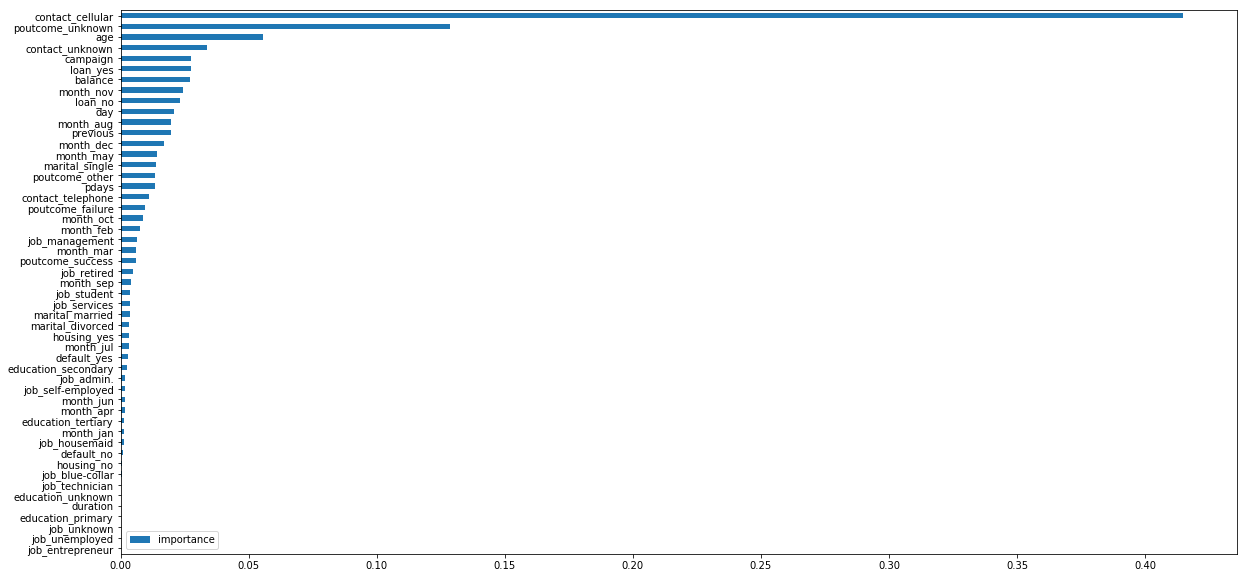

In [35]:
plot_feature_importance(rf)

#### Gradient Boosting Trees

     metrics     train      test
0        AUC  0.954265  0.927629
1   Accuracy  0.929938  0.902577
2  Precision  0.770633  0.611794
3     Recall  0.570043  0.468485
4   f1-score  0.655332  0.530634


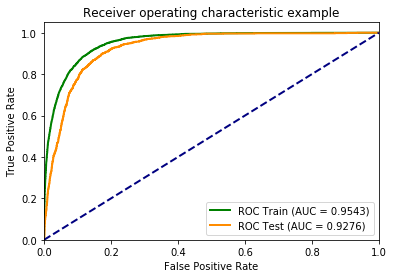

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
params_gbt = {'n_estimators': 50,
              'max_depth': 5,
              'learning_rate': 0.2,
              'random_state': 42}

# params_gbt = {'n_estimators': 50,
#               'max_depth': 5,
#               'learning_rate': 0.2,
#               'subsample': 0.7,
#               'max_features': 0.8,
#               'random_state': 42}

gbt = GradientBoostingClassifier(**params_gbt)

train_test_model(gbt, X_train, y_train, X_test, y_test)

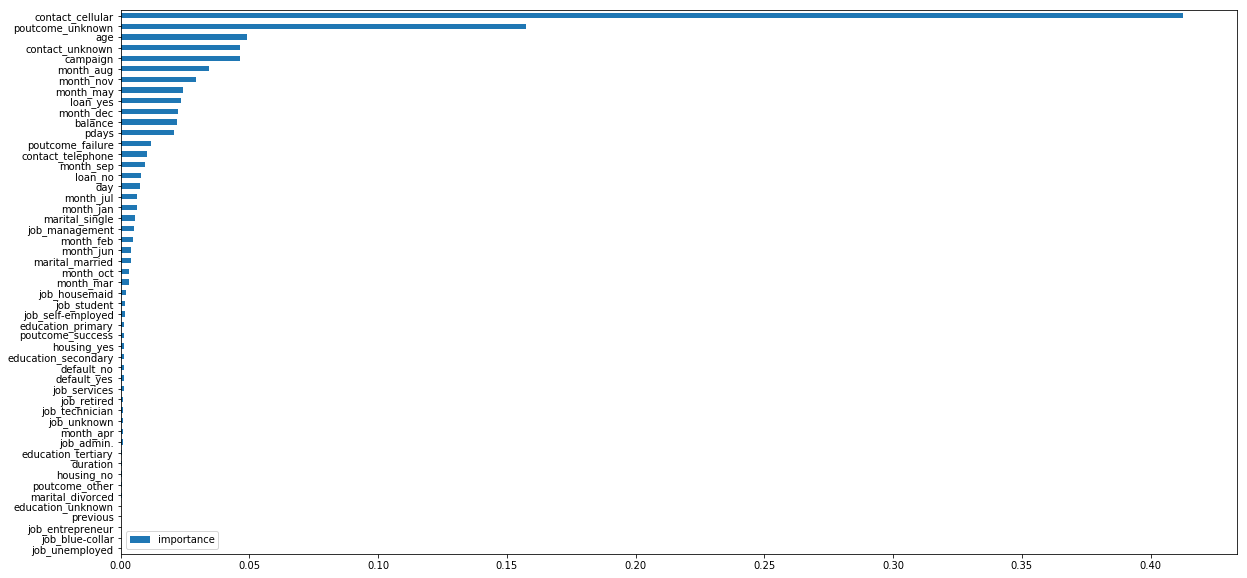

In [37]:
plot_feature_importance(gbt)

#### Neural Network

     metrics     train      test
0        AUC  0.909686  0.897940
1   Accuracy  0.901653  0.892956
2  Precision  0.600420  0.554913
3     Recall  0.473261  0.451552
4   f1-score  0.529311  0.497925


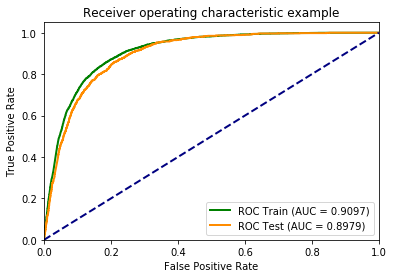

In [38]:
from sklearn.neural_network import MLPClassifier
paras_nn = {'solver': 'adam',
            'activation':'relu',
            'alpha': 1e-6,
            'hidden_layer_sizes': (10, 10, 10),
            'learning_rate': 'adaptive',
            'random_state': 1}
nn = MLPClassifier(**paras_nn)

train_test_model(nn, X_train, y_train, X_test, y_test)

#### Linear SVM

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


     metrics     train      test
0        AUC  0.593720  0.593112
1   Accuracy  0.889847  0.886321
2  Precision  0.580132  0.542579
3     Recall  0.207288  0.209784
4   f1-score  0.305439  0.302578


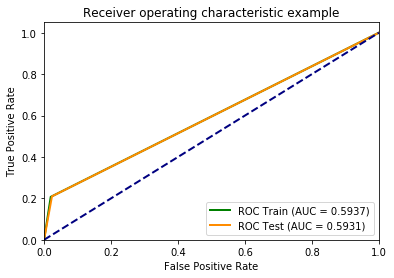

In [39]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred)
plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)

#### Non-linear SVM

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


     metrics     train      test
0        AUC  0.893727  0.655641
1   Accuracy  0.930823  0.882451
2  Precision  1.000000  0.000000
3     Recall  0.407951  0.000000
4   f1-score  0.579496  0.000000


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


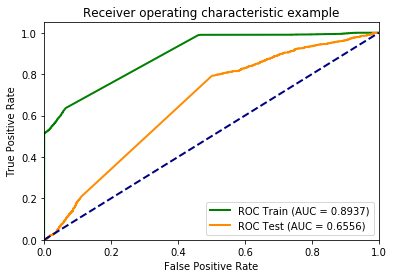

In [40]:
from sklearn.svm import SVC
paras_svm = {'probability': True,
             'max_iter': 2000}
svm = SVC(**paras_svm)

train_test_model(svm, X_train, y_train, X_test, y_test)

#### Hpyerparameter Tuning: Grid Search

     metrics     train      test
0        AUC  0.995741  0.928554
1   Accuracy  0.971411  0.901139
2  Precision  0.983636  0.625557
3     Recall  0.768102  0.396049
4   f1-score  0.862610  0.485023


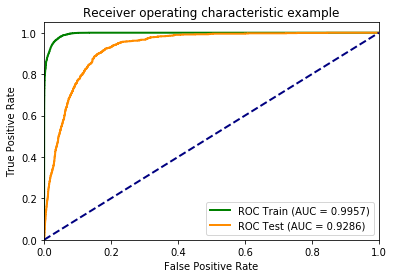

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200],
              'max_features': ['auto'],
              'criterion': ['gini'],
              'max_depth': [15, 20, 25],
              'min_samples_split': [2],
              'min_samples_leaf': [2, 10, 20],
              'n_jobs': [-1]}

acc_scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_
clf.fit(X_train, y_train)

train_test_model(clf, X_train, y_train, X_test, y_test)

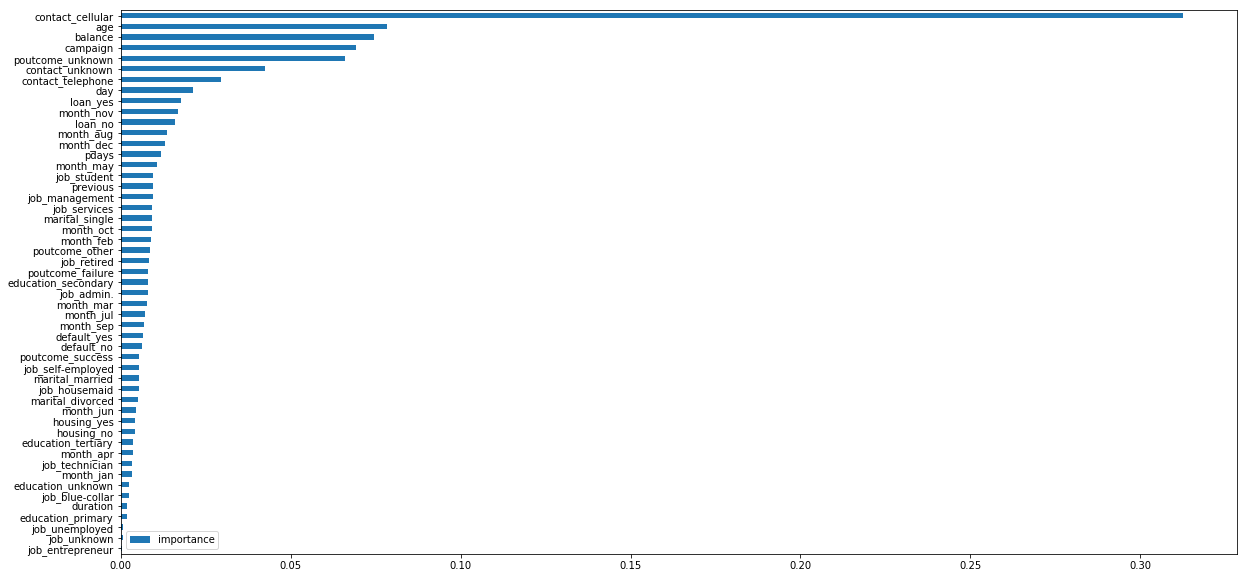

In [42]:
plot_feature_importance(clf)